# Practical Statistics for Data Scientists

source : https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

This notebook is a summary of the key points to be extracted from the Book **Practical Statistics for Data Scientists** by Peter Bruce, Andrew Bruce and Peter Gedeck

I will gather the most important concepts as well as python codes that can constitute strong basis for future structured analysis. I will also put some standard concepts as a quick reminder and others that might seem simple but that I am not familiar with.

In [32]:
#Imports
import numpy as np
import pandas as pd

from scipy.stats import trim_mean
import wquantiles

from statsmodels import robust

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
# file load
STATE_CSV = DATA / 'state.csv'

## 1. Estimates of Location

In [5]:
state = pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
#mean
state['Population'].mean()

6162876.3

* **Trim mean** : This is the mean of the dataset after the smallest 10% and largest 10% of values have been removed from the dataset. (Moyenne tronquée)

In [8]:
#trim_mean
trim_mean(state['Population'],0.1)

4783697.125

In [10]:
#median
state['Population'].median()

4436369.5

* **Weighted Mean** : (Moyenne Pondérée)

In [13]:
#normal mean
state['Murder.Rate'].mean()

4.066

In [14]:
#Weighted mean
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

* **Weighted Median** : (Mediane Pondérée)

In [16]:
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

4.4

! **Median** and **Weighted Median** are considered **Robust estimates** cause they are less afflicted by outliers

## 2. Estimates of Variability

**Variability**, also known as **dispersion** refers to how spread the data is. It gives an indication on how much data varies within the set (diverse data).

**Deviation from the mean** are the differences between the observation and the mean. Which gives how far the data is from the mean.

* **Mean absolute Deviation** : average of the absolute vlaues of the deviations from the mean

In [17]:
state['Population'].mad()

4450933.356000001

* **Variance** : gives an idea of how spread the dataset is. A small number means the dataset is tightly clustered, a large number means the values are more spread apart.

In [18]:
np.var(state['Population'])

45960360825926.56

* **Standard deviation** : tells how tightly data is clustered around the mean. small SD data is tightly clustered (taller bell curve), large SD data is more spread apart 

In [22]:
state['Population'].std()

6848235.347401142

! **MAD, Variance** and **SD** are NOT robust to outliers

* **Median Absolute Deviation** : Median of the difference of each observation to the median. It is a robust estimate

In [21]:
robust.scale.mad(state['Population'])

3849876.1459979336

## 3. Estimates based on Percentile

The 50th percentile is the median

* **IQR** : Common measurement of Variability is the difference between the 25th and 75th percentile called the **Inter Quartile Range**

In [24]:
np.percentile(state['Population'],75) - np.percentile(state['Population'],25)

4847308.0

OR

In [28]:
from scipy.stats import iqr

iqr(state['Population'])

4847308.0

## 4. Percentiles and Boxplots

In [36]:
state['Population'].quantile([0.25,0.5, 0.75, 1])

0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
1.00    37253956.00
Name: Population, dtype: float64

* **Boxplot**

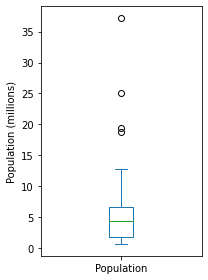

In [35]:
ax = (state['Population']/1000000).plot.box(figsize=(3,4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

- Bottom of the box : 25th percentile
- Top of the box : 75th percentile
- Box : IQR
- line in the box : median
- whiskers outside of the IQR : bulk of the data
- Bottom Whisker : min obs
- Top Whisker : max obs
- points outside of the whiskers : outliers

## Frequency Tables and histograms

* **Frequency table** divides variable range into equally spaced segments and tells us how many values fall within each segment. Creates equal sized bins

In [39]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [48]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state,binnedPopulation],axis=1)

df.sort_values(by='Population',inplace=True)
df.head()

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"


In [56]:
groups = []

#group  : returns binnedPopulation cell
#subset : returns the dataframe with the same binnedPopulation

for group, subset in df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange':group,
        'Count':len(subset),
        'States':','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA
